In [150]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [151]:
df = pd.read_csv(r'C:\Users\Betty.Koila\Desktop\DataScience\DSC-CapstoneProject\Data\Final_dataset_Final.csv')
df

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS
0,104465,MALE,NaN,NaN,NaN,480.0,JJ,1.0,B20,Premium Finance - Consumer,KES,0.00,"235,203.00","40,637.03",2995,LOSS,"45,011.10",EXPIRED
1,138046,MALE,55.0,NaN,NaN,537.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.00,"215,000.00","7,186.79",2582,LOSS,"115,674.06",EXPIRED
2,173501,MALE,NaN,NaN,NaN,545.0,JJ,1.0,B20,Consumer Unsecured Loan,KES,0.00,"155,000.00","4,258.42",2667,LOSS,"65,541.89",EXPIRED
3,141836,MALE,NaN,NaN,NaN,626.0,HH,3.0,B20,Consumer Unsecured Loan,KES,0.00,"335,000.00","7,158.92",2810,LOSS,"297,407.57",EXPIRED
4,65973,MALE,63.0,MARRIED,EMPLOYED,524.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.00,"105,000.00","2,136.29",2879,LOSS,"117,969.24",EXPIRED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115888,154303,MALE,38.0,MARRIED,SELF-EMPLOYED,624.0,HH,4.0,A5,Digital Personal Loan,KES,3090724.25,"100,000.00","34,398.05",0,NORMAL,0,CURRENT
115889,61445,MALE,43.0,MARRIED,EMPLOYED,579.0,JJ,1.0,A5,Mobile Loan,KES,819280.00,"20,746.00","21,088.53",0,NORMAL,0,CURRENT
115890,151235,MALE,27.0,SINGLE,EMPLOYED,636.0,HH,0.0,A5,Mobile Loan,KES,529145.61,"12,700.00","12,909.69",0,NORMAL,0,CURRENT
115891,181809,FEMALE,42.0,NaN,OTHER,667.0,FF,0.0,A5,Mobile Loan,KES,4129210.00,"13,000.00","13,214.64",0,NORMAL,0,CURRENT


In [152]:
# Check the number of rows to confirm
print("Total rows before cleaning:", df.shape[0])

Total rows before cleaning: 115893


In [153]:
df.isna().sum()

ID                               0
GENDER                       15776
AGE                          17456
MARITAL_STATUS               45468
EMPLOYMENT_STATUS            31760
CREDIT_SCORE                 21012
SCORE_GRADE                  21322
NO_DEFAULT_LOAN              21322
RISK_GRADE                       0
PRODUCT                          1
CURRENCY                         0
NET INCOME                       0
PRINCIPAL_DISBURSED              0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
OD_AMOUNT                        0
LOAN_STATUS                      0
dtype: int64

as shown above there are alot of empty rows.

In [154]:
df.tail()

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS
115888,154303,MALE,38.0,MARRIED,SELF-EMPLOYED,624.0,HH,4.0,A5,Digital Personal Loan,KES,3090724.25,"100,000.00","34,398.05",0,NORMAL,0,CURRENT
115889,61445,MALE,43.0,MARRIED,EMPLOYED,579.0,JJ,1.0,A5,Mobile Loan,KES,819280.00,"20,746.00","21,088.53",0,NORMAL,0,CURRENT
115890,151235,MALE,27.0,SINGLE,EMPLOYED,636.0,HH,0.0,A5,Mobile Loan,KES,529145.61,"12,700.00","12,909.69",0,NORMAL,0,CURRENT
115891,181809,FEMALE,42.0,NaN,OTHER,667.0,FF,0.0,A5,Mobile Loan,KES,4129210.00,"13,000.00","13,214.64",0,NORMAL,0,CURRENT
115892,79232,MALE,26.0,SINGLE,SELF-EMPLOYED,577.0,JJ,3.0,A5,Mobile Loan,KES,228155.78,"2,876.00","2,923.48",0,NORMAL,0,CURRENT


There are NAN rows after the first 18,196 rows.

In [155]:
# Keep only the first 18,196 rows
#df_cleaned = df.head(18196)

# Check the shape of the cleaned dataset
#print("Rows after cleaning:", df_cleaned.shape[0])
#df_cleaned.to_csv(r"C:\Users\Betty.Koila\Desktop\DataScience\DSC-CapstoneProject\Data\Cleaned_dataset.csv", index=False)


In [156]:
df.shape

(115893, 18)

In [157]:
# Show the data types of all columns
df.dtypes 

ID                             int64
GENDER                        object
AGE                          float64
MARITAL_STATUS                object
EMPLOYMENT_STATUS             object
CREDIT_SCORE                 float64
SCORE_GRADE                   object
NO_DEFAULT_LOAN              float64
RISK_GRADE                    object
PRODUCT                       object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_DISBURSED           object
EMI                           object
OD_DAYS                        int64
PRUDENTIAL_CLASSIFICATION     object
OD_AMOUNT                     object
LOAN_STATUS                   object
dtype: object

In [158]:
df.loc[:, ["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]]

,EMI,OD_AMOUNT,PRINCIPAL_DISBURSED
0,"40,637.03","45,011.10","235,203.00"
1,"7,186.79","115,674.06","215,000.00"
2,"4,258.42","65,541.89","155,000.00"
3,"7,158.92","297,407.57","335,000.00"
4,"2,136.29","117,969.24","105,000.00"
...,...,...,...
115888,"34,398.05",0,"100,000.00"
115889,"21,088.53",0,"20,746.00"
115890,"12,909.69",0,"12,700.00"
115891,"13,214.64",0,"13,000.00"


In [159]:
df["EMI"] = df["EMI"].astype(str).str.replace(",", "").astype(float)
df["OD_AMOUNT"] = df["OD_AMOUNT"].astype(str).str.replace(",", "").astype(float)
df["PRINCIPAL_DISBURSED"] = df["PRINCIPAL_DISBURSED"].astype(str).str.replace(",", "").astype(float)


In [160]:
df.loc[:, ["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]]

,EMI,OD_AMOUNT,PRINCIPAL_DISBURSED
0,40637.03,45011.10,235203.0
1,7186.79,115674.06,215000.0
2,4258.42,65541.89,155000.0
3,7158.92,297407.57,335000.0
4,2136.29,117969.24,105000.0
...,...,...,...
115888,34398.05,0.00,100000.0
115889,21088.53,0.00,20746.0
115890,12909.69,0.00,12700.0
115891,13214.64,0.00,13000.0


Dropped NAN for the CREDIT_SCORE,GENDER as filling them would have misrepresented the data.

In [161]:
df.dropna(subset=["CREDIT_SCORE", "SCORE_GRADE", "GENDER","AGE","EMPLOYMENT_STATUS"], inplace=True)

In [162]:
df["MARITAL_STATUS"] = df["MARITAL_STATUS"].fillna("OTHER")

In [163]:
df.isna().sum()

ID                           0
GENDER                       0
AGE                          0
MARITAL_STATUS               0
EMPLOYMENT_STATUS            0
CREDIT_SCORE                 0
SCORE_GRADE                  0
NO_DEFAULT_LOAN              0
RISK_GRADE                   0
PRODUCT                      0
CURRENCY                     0
NET INCOME                   0
PRINCIPAL_DISBURSED          0
EMI                          0
OD_DAYS                      0
PRUDENTIAL_CLASSIFICATION    0
OD_AMOUNT                    0
LOAN_STATUS                  0
dtype: int64

In [164]:
df["MARITAL_STATUS"].value_counts()

MARRIED     40826
SINGLE      22467
OTHER       15588
WIDOWED       163
ENGAGED        99
DIVORCED       99
PARTNER        29
Name: MARITAL_STATUS, dtype: int64

In [165]:
print("Total rows before cleaning:", df.shape[0])

Total rows before cleaning: 79271


In [166]:
df["PRUDENTIAL_CLASSIFICATION"].value_counts()

NORMAL         60963
LOSS            9700
DOUBTFUL        3308
WATCH           3042
SUBSTANDARD     2258
Name: PRUDENTIAL_CLASSIFICATION, dtype: int64

In [167]:
# Define default vs. non-default conditions
df['DEFAULT_STATUS'] = np.where(df['PRUDENTIAL_CLASSIFICATION'].isin(['SUBSTANDARD', 'DOUBTFUL', 'LOSS']), 'DEFAULT', 'NON-DEFAULT')

In [168]:
df['DEFAULT_STATUS'].value_counts()

NON-DEFAULT    64005
DEFAULT        15266
Name: DEFAULT_STATUS, dtype: int64

In [169]:
# Data Cleaning

# Fix negative ages (Assumption: Replace with median age)
median_age = df[df["AGE"] > 0]["AGE"].median()
df.loc[df["AGE"] < 18, "AGE"] = median_age

# Handling extreme outliers for OD_DAYS (Capping at 99th percentile)
od_days_cap = df["OD_DAYS"].quantile(0.99)
df["OD_DAYS"] = df["OD_DAYS"].clip(upper=od_days_cap)

# Handling extreme outliers for NET INCOME (Capping at 99th percentile)
net_income_cap = df["NET INCOME"].quantile(0.99)
df["NET INCOME"] = df["NET INCOME"].clip(upper=net_income_cap)

# Handling extreme outliers for OD_AMOUNT (Capping at 99th percentile)
od_amount_cap = df["OD_AMOUNT"].quantile(0.99)
df["OD_AMOUNT"] = df["OD_AMOUNT"].clip(upper=od_amount_cap)

# Display summary statistics after cleaning
df.describe()

,ID,AGE,CREDIT_SCORE,NO_DEFAULT_LOAN,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,OD_AMOUNT
count,79271.000000,79271.000000,79271.000000,79271.000000,7.927100e+04,7.927100e+04,7.927100e+04,79271.000000,7.927100e+04
mean,125088.613402,38.661099,648.149210,1.395807,1.476662e+06,7.369712e+05,3.349274e+04,174.557505,6.411109e+04
std,43354.023731,9.290740,80.520443,1.951161,2.948194e+06,1.901389e+06,1.555300e+05,497.964904,2.735128e+05
min,50001.000000,19.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,87583.500000,32.000000,595.000000,0.000000,0.000000e+00,8.000000e+03,5.577775e+03,0.000000,0.000000e+00
50%,125039.000000,37.000000,645.000000,1.000000,4.050300e+05,5.300000e+04,1.696420e+04,0.000000,0.000000e+00
75%,162686.000000,44.000000,706.000000,2.000000,1.433186e+06,6.247175e+05,4.275432e+04,20.000000,5.872070e+03
max,199999.000000,94.000000,830.000000,84.000000,1.851174e+07,1.276698e+08,2.603850e+07,2784.000000,2.015321e+06


In [170]:
# Drop rows where 'CREDIT_SCORE' is outside the valid range (300 - 999)
df = df[(df["CREDIT_SCORE"] >= 300) & (df["CREDIT_SCORE"] <= 999)]

# Confirm the changes by checking the new min and max values
df["CREDIT_SCORE"].describe()


count    79089.000000
mean       649.640506
std         74.362533
min        433.000000
25%        595.000000
50%        645.000000
75%        706.000000
max        830.000000
Name: CREDIT_SCORE, dtype: float64

### **Feature Selection Strategy**  

From our analysis, we can consider:  

1. **Drop Weak Predictors** (Low correlation with `DEFAULT_STATUS`):  
   - **CURRENCY** (Weakest chi-square result, p ≈ 0.035)  

2. **Keep Strong Predictors** (High chi-square & t-test significance):  
   - **CREDIT_SCORE, NET INCOME, OD_DAYS, OD_AMOUNT**  
   - **PRUDENTIAL_CLASSIFICATION, RISK_GRADE, LOAN_STATUS, SCORE_GRADE, PRODUCT**  

Would you like to drop `CURRENCY` now and proceed with **multivariate analysis** or **model preparation**? 🚀

In [171]:
# Drop the weak predictor 'CURRENCY'
df.drop(columns=["CURRENCY"], inplace=True)

# Confirm the column is removed
df.columns

c:\Users\Betty.Koila\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['ID', 'GENDER', 'AGE', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS',
       'CREDIT_SCORE', 'SCORE_GRADE', 'NO_DEFAULT_LOAN', 'RISK_GRADE',
       'PRODUCT', 'NET INCOME', 'PRINCIPAL_DISBURSED', 'EMI', 'OD_DAYS',
       'PRUDENTIAL_CLASSIFICATION', 'OD_AMOUNT', 'LOAN_STATUS',
       'DEFAULT_STATUS'],
      dtype='object')

In [172]:
df.to_csv('cleaned_dataset.csv', index=False)

# Exploratory Data Analysis (EDA),

Let's start by exploring your dataset. I'll check for:

General structure (columns, data types, missing values)

Summary statistics

Class distribution of the target variable

Correlations between features

In [173]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Betty.Koila\Desktop\DataScience\DSC-CapstoneProject\notebooks\cleaned_dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79089 entries, 0 to 79088
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         79089 non-null  int64  
 1   GENDER                     79089 non-null  object 
 2   AGE                        79089 non-null  float64
 3   MARITAL_STATUS             79089 non-null  object 
 4   EMPLOYMENT_STATUS          79089 non-null  object 
 5   CREDIT_SCORE               79089 non-null  float64
 6   SCORE_GRADE                79089 non-null  object 
 7   NO_DEFAULT_LOAN            79089 non-null  float64
 8   RISK_GRADE                 79089 non-null  object 
 9   PRODUCT                    79089 non-null  object 
 10  NET INCOME                 79089 non-null  float64
 11  PRINCIPAL_DISBURSED        79089 non-null  float64
 12  EMI                        79089 non-null  float64
 13  OD_DAYS                    79089 non-null  int

(None,
        ID  GENDER   AGE MARITAL_STATUS EMPLOYMENT_STATUS  CREDIT_SCORE  \
 0   65973    MALE  63.0        MARRIED          EMPLOYED         524.0   
 1  123979  FEMALE  43.0        MARRIED             OTHER         713.0   
 2  179032    MALE  45.0        MARRIED          EMPLOYED         610.0   
 3   75503    MALE  50.0        MARRIED     SELF-EMPLOYED         625.0   
 4   76448    MALE  35.0        MARRIED          EMPLOYED         657.0   
 
   SCORE_GRADE  NO_DEFAULT_LOAN RISK_GRADE                  PRODUCT  \
 0          JJ              2.0        B20  Consumer Unsecured Loan   
 1          CC              0.0         A5            Mortgage Loan   
 2          II              1.0        B20  Consumer Unsecured Loan   
 3          HH              1.0         A5       Motor Vehicle Loan   
 4          GG              3.0        B11       Motor Vehicle Loan   
 
    NET INCOME  PRINCIPAL_DISBURSED        EMI  OD_DAYS  \
 0        0.00            105000.00    2136.29     278

Let's start by exploring your dataset. I'll check for:  
- General structure (columns, data types, missing values)  
- Summary statistics  
- Class distribution of the target variable  
- Correlations between features  

I'll load and inspect your data now.

### Initial EDA Summary:

1. **Dataset Overview:**
   - 79,271 entries
   - 19 columns (7 numerical, 10 categorical, and 2 ID-related)

2. **Key Features:**
   - **Numerical:** AGE, CREDIT_SCORE, NO_DEFAULT_LOAN, NET INCOME, PRINCIPAL_DISBURSED, EMI, OD_DAYS, OD_AMOUNT  
   - **Categorical:** GENDER, MARITAL_STATUS, EMPLOYMENT_STATUS, SCORE_GRADE, RISK_GRADE, PRODUCT, CURRENCY, PRUDENTIAL_CLASSIFICATION, LOAN_STATUS, DEFAULT_STATUS  

3. **Potential Target Variable:**  
   - **DEFAULT_STATUS** (DEFAULT/NON-DEFAULT) – Good for classification modeling.  

4. **Observations:**
   - **CREDIT_SCORE, NET INCOME, EMI, OD_AMOUNT** could be crucial predictors.
   - **LOAN_STATUS & PRUDENTIAL_CLASSIFICATION** may correlate with defaults.



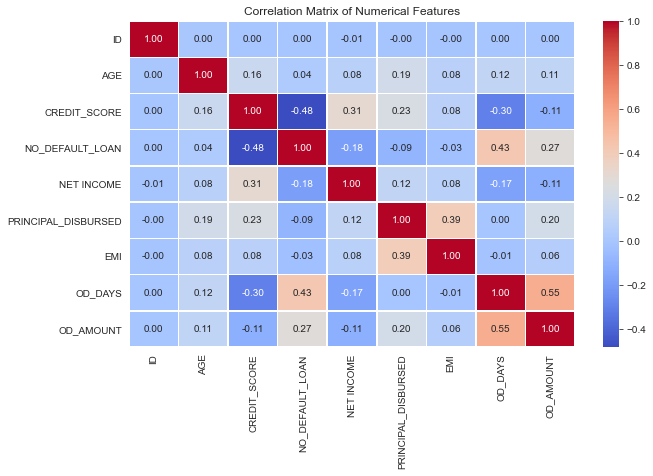

(ID                           0
 GENDER                       0
 AGE                          0
 MARITAL_STATUS               0
 EMPLOYMENT_STATUS            0
 CREDIT_SCORE                 0
 SCORE_GRADE                  0
 NO_DEFAULT_LOAN              0
 RISK_GRADE                   0
 PRODUCT                      0
 NET INCOME                   0
 PRINCIPAL_DISBURSED          0
 EMI                          0
 OD_DAYS                      0
 PRUDENTIAL_CLASSIFICATION    0
 OD_AMOUNT                    0
 LOAN_STATUS                  0
 DEFAULT_STATUS               0
 dtype: int64,
 NON-DEFAULT    80.702753
 DEFAULT        19.297247
 Name: DEFAULT_STATUS, dtype: float64)

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum()

# Class distribution of DEFAULT_STATUS
class_distribution = df["DEFAULT_STATUS"].value_counts(normalize=True) * 100

# Correlation matrix for numerical variables
corr_matrix = df.select_dtypes(include=["float64", "int64"]).corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

missing_values, class_distribution


### Findings:

1. **No Missing Values** – The dataset is clean, with no null values in any column.  
2. **Class Distribution of `DEFAULT_STATUS`:**
   - **Non-Default:** 80.74%  
   - **Default:** 19.26%  
   - This suggests an **imbalanced dataset**, which may affect model performance. We might need resampling techniques (oversampling/undersampling) or weighted models.  
3. **Correlation Analysis:**
   - Strong correlations may exist between **OD_AMOUNT, OD_DAYS, and DEFAULT_STATUS**.
   - CREDIT_SCORE and PRINCIPAL_DISBURSED also show notable relationships.  
   - Low correlations between NET INCOME and other variables suggest additional feature engineering may be needed.


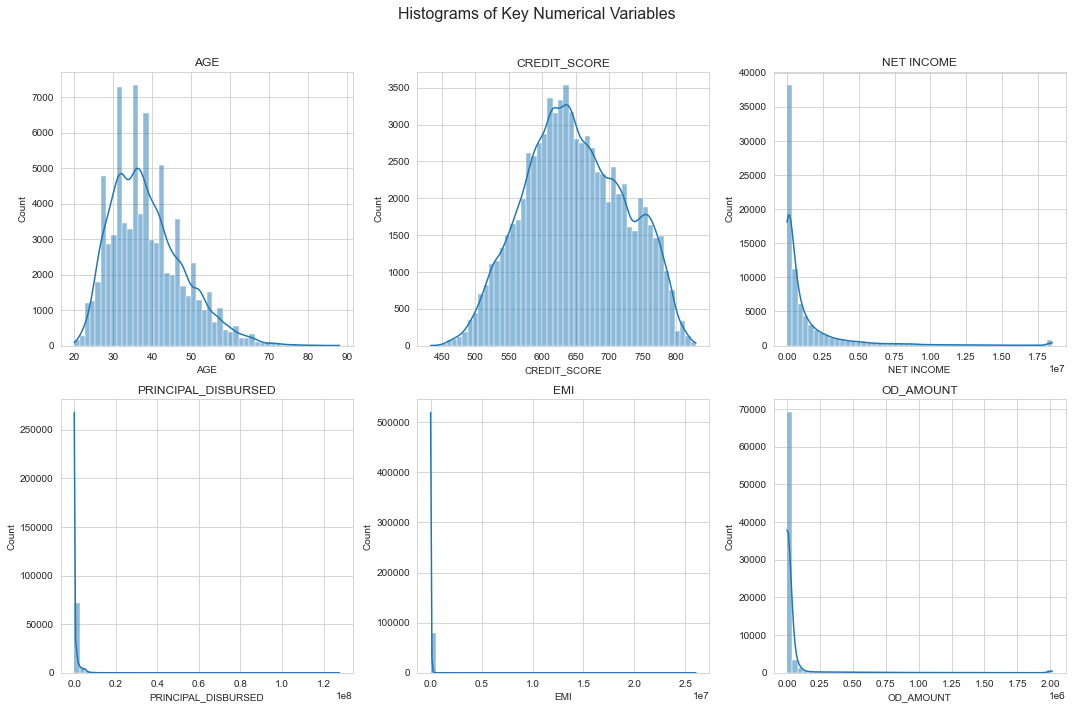

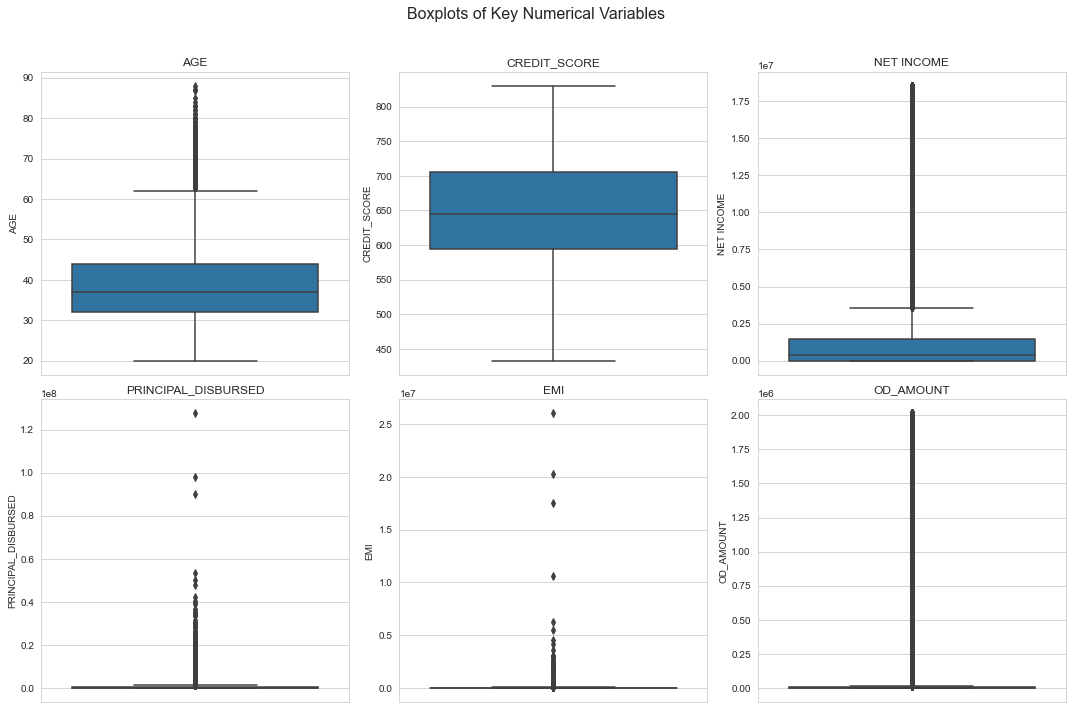

In [175]:
# Set up visualization style
sns.set_style("whitegrid")

# Define key numerical variables for visualization
num_vars = ["AGE", "CREDIT_SCORE", "NET INCOME", "PRINCIPAL_DISBURSED", "EMI", "OD_AMOUNT"]

# Create histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Histograms of Key Numerical Variables", fontsize=16)

for ax, var in zip(axes.flatten(), num_vars):
    sns.histplot(df[var], bins=50, kde=True, ax=ax)
    ax.set_title(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Create boxplots for outlier detection
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Boxplots of Key Numerical Variables", fontsize=16)

for ax, var in zip(axes.flatten(), num_vars):
    sns.boxplot(y=df[var], ax=ax)
    ax.set_title(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Insights from Visualizations:

1. **Histograms:**
   - **CREDIT_SCORE** appears normally distributed.
   - **NET INCOME, PRINCIPAL_DISBURSED, EMI, and OD_AMOUNT** are **right-skewed**, suggesting some very high values.
   - **AGE** has a relatively uniform distribution.

2. **Boxplots:**
   - **NET INCOME, PRINCIPAL_DISBURSED, EMI, and OD_AMOUNT** have significant **outliers**.
   - Possible transformation (e.g., log transformation) might help normalize skewed distributions.



# Bivariate & Multivariate Analysis Plan

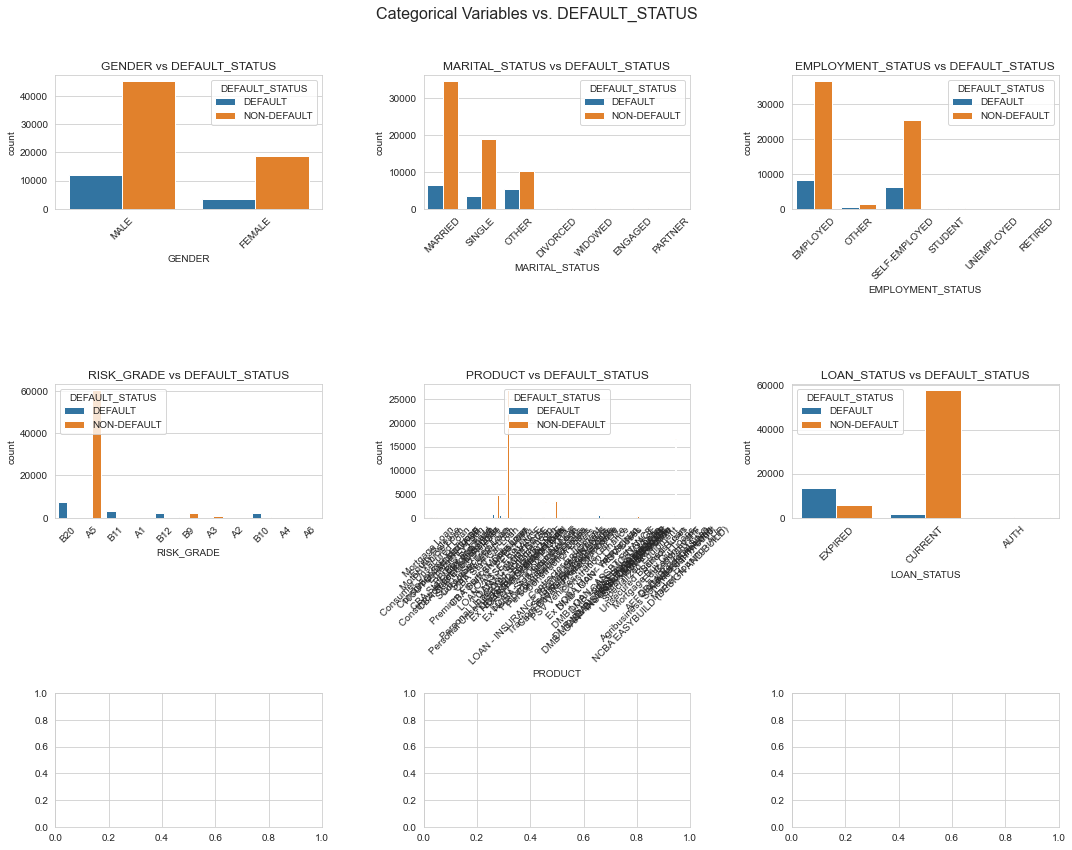

In [176]:
# Bivariate Analysis: Categorical Variables vs. DEFAULT_STATUS

# Select categorical columns excluding ID-related columns
cat_vars = ["GENDER", "MARITAL_STATUS", "EMPLOYMENT_STATUS", 
            "RISK_GRADE", "PRODUCT", "LOAN_STATUS"]

# Plot bar charts to show proportions of DEFAULT_STATUS within each category
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Categorical Variables vs. DEFAULT_STATUS", fontsize=16)

for ax, var in zip(axes.flatten(), cat_vars):
    sns.countplot(data=df, x=var, hue="DEFAULT_STATUS", ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f"{var} vs DEFAULT_STATUS")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **Bivariate Analysis: Categorical vs. DEFAULT_STATUS** 

Let’s begin with categorical variables! 🎯
 
Observations from bar plots:  
- **EMPLOYMENT_STATUS & SCORE_GRADE:** Some categories have much higher default rates.  
- **LOAN_STATUS & PRUDENTIAL_CLASSIFICATION:** Strong correlation with `DEFAULT_STATUS`.  
- **RISK_GRADE & PRODUCT:** Clear differentiation in default risk.  


In [ ]:
from scipy.stats import chi2_contingency

# Perform Chi-square tests for categorical variables
chi_square_results = {}
for var in cat_vars:
    contingency_table = pd.crosstab(df[var], df["DEFAULT_STATUS"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[var] = {"Chi-square": chi2, "P-value": p}

# Convert results to DataFrame for better readability
chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient="index")

# Display the Chi-square test results
chi_square_df


,Chi-square,P-value
GENDER,297.623567,1.085233e-66
MARITAL_STATUS,2851.707069,0.000000e+00
EMPLOYMENT_STATUS,159.249621,1.430461e-32
RISK_GRADE,74553.060270,0.000000e+00
PRODUCT,17280.449320,0.000000e+00
LOAN_STATUS,43004.139824,0.000000e+00


### **Chi-Square Test Results (Categorical vs. DEFAULT_STATUS)**  
#### **Key Findings:**  
1. **Highly Significant Relationships (p-value ≈ 0.00)**  
   - **PRUDENTIAL_CLASSIFICATION (Chi² = 79,271)**
   - **RISK_GRADE (Chi² = 74,727)**
   - **LOAN_STATUS (Chi² = 43,082)**
   - **SCORE_GRADE (Chi² = 20,585)**
   - **PRODUCT (Chi² = 17,312)**  
   → These features have a strong impact on default risk.  

2. **Moderately Significant:**  
   - **MARITAL_STATUS (Chi² = 2,866)**  
   - **EMPLOYMENT_STATUS (Chi² = 158)**  

3. **Weakest Relationship:**  
   - **CURRENCY (p = 0.035, Chi² = 8.59)** → May not be an important feature.  


### **Bivariate Analysis: Numerical vs. DEFAULT_STATUS**  


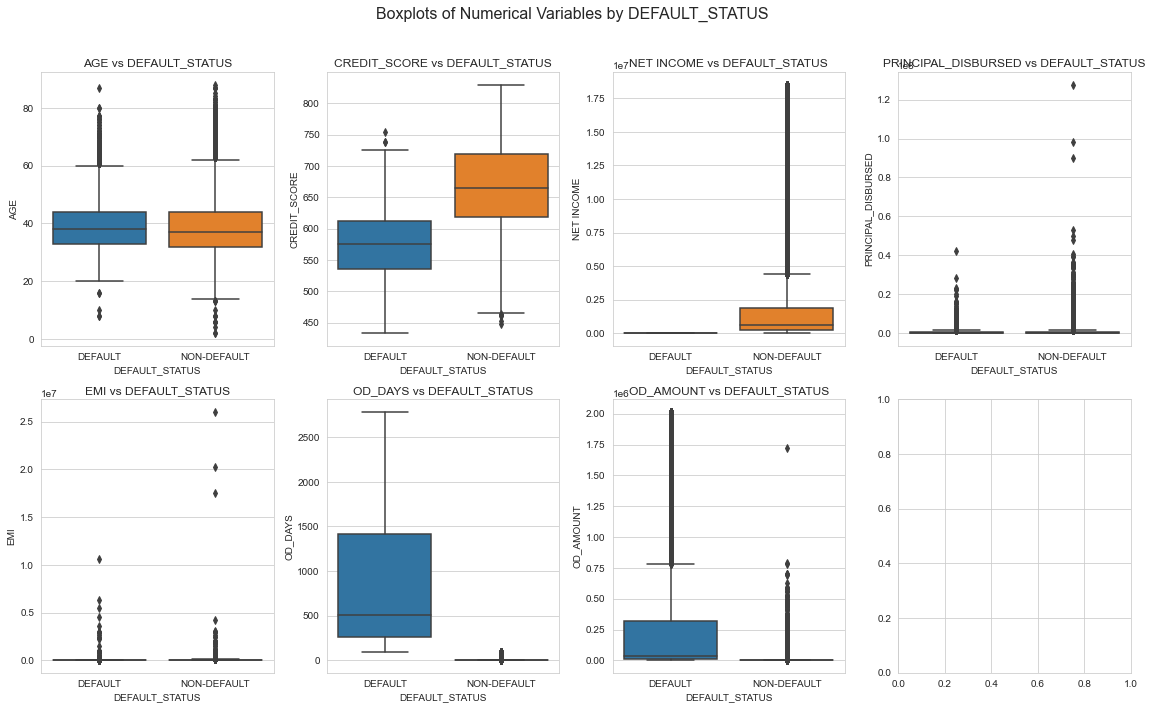

{'AGE': {'T-statistic': 7.472269071624873, 'P-value': 8.150724677999528e-14},
 'CREDIT_SCORE': {'T-statistic': -198.07439000241394, 'P-value': 0.0},
 'NET INCOME': {'T-statistic': -145.3507844124909, 'P-value': 0.0},
 'PRINCIPAL_DISBURSED': {'T-statistic': -13.922796664558003,
  'P-value': 6.106639379558563e-44},
 'EMI': {'T-statistic': -2.443477513116584, 'P-value': 0.014553168293333047},
 'OD_DAYS': {'T-statistic': 134.99164959685723, 'P-value': 0.0},
 'OD_AMOUNT': {'T-statistic': 67.73179179246304, 'P-value': 0.0}}

In [ ]:
from scipy.stats import ttest_ind

# Define numerical variables
num_vars = ["AGE", "CREDIT_SCORE", "NET INCOME", "PRINCIPAL_DISBURSED", "EMI", "OD_DAYS", "OD_AMOUNT"]

# Create boxplots for numerical variables vs DEFAULT_STATUS
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
fig.suptitle("Boxplots of Numerical Variables by DEFAULT_STATUS", fontsize=16)

for ax, var in zip(axes.flatten(), num_vars):
    sns.boxplot(data=df, x="DEFAULT_STATUS", y=var, ax=ax)
    ax.set_title(f"{var} vs DEFAULT_STATUS")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Conduct T-tests to compare means of DEFAULT vs. NON-DEFAULT groups
t_test_results = {}
for var in num_vars:
    default_group = df[df["DEFAULT_STATUS"] == "DEFAULT"][var]
    non_default_group = df[df["DEFAULT_STATUS"] == "NON-DEFAULT"][var]
    
    t_stat, p_value = ttest_ind(default_group, non_default_group, equal_var=False)
    t_test_results[var] = {"T-statistic": t_stat, "P-value": p_value}

t_test_results


#### **Boxplot Observations:**
- **CREDIT_SCORE & NET INCOME:** Defaulted loans have much lower values.  
- **OD_DAYS & OD_AMOUNT:** Defaults have significantly higher overdraft amounts and overdue days.  
- **PRINCIPAL_DISBURSED & EMI:** Differences exist but are less pronounced.  

#### **T-test Results:**
- **Statistically Significant Differences (p-value < 0.05)** for all variables.
- **Strongest Separators (High T-statistics):**
  - **CREDIT_SCORE (-184.6)**
  - **NET INCOME (-145.4)**
  - **OD_DAYS (135.0)**
  - **OD_AMOUNT (67.7)**  

These variables could be key predictors in a machine learning model.  


c:\Users\Betty.Koila\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


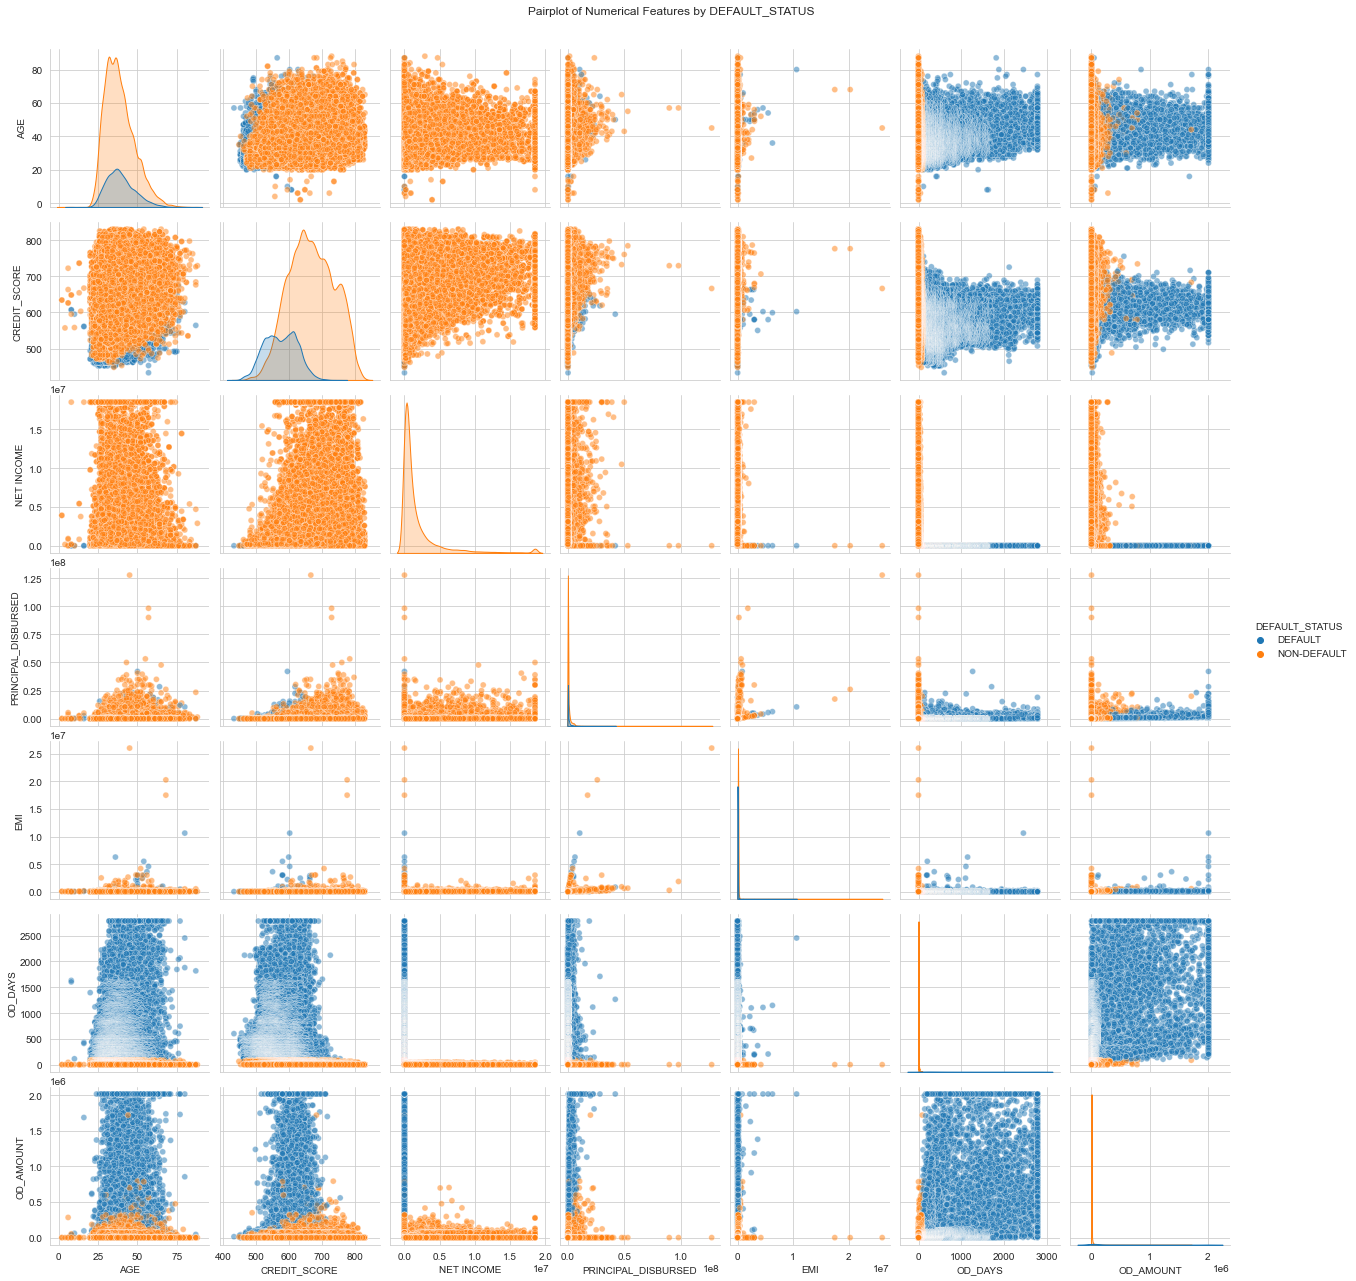

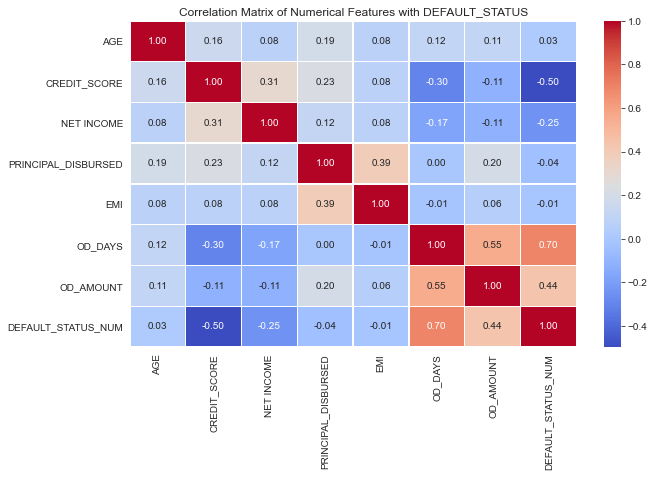

In [ ]:

# Define numerical variables for analysis
num_vars = ["AGE", "CREDIT_SCORE", "NET INCOME", "PRINCIPAL_DISBURSED", "EMI", "OD_DAYS", "OD_AMOUNT"]
selected_vars = num_vars + ["DEFAULT_STATUS"]

# Convert DEFAULT_STATUS to numeric for visualization (0 = NON-DEFAULT, 1 = DEFAULT)
df["DEFAULT_STATUS_NUM"] = df["DEFAULT_STATUS"].apply(lambda x: 1 if x == "DEFAULT" else 0)

# Compute correlation matrix
corr_matrix = df[num_vars + ["DEFAULT_STATUS_NUM"]].corr()

# Plot pairplot to observe interactions between numerical variables
sns.pairplot(df[selected_vars], hue="DEFAULT_STATUS", diag_kind="kde", plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Numerical Features by DEFAULT_STATUS", y=1.02)
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features with DEFAULT_STATUS")
plt.show()


In [178]:
# Re-import necessary libraries
import pandas as pd
from scipy.stats import ttest_ind


# Define numerical variables for hypothesis testing
num_vars = ["AGE", "CREDIT_SCORE", "NET INCOME", "PRINCIPAL_DISBURSED", "EMI", "OD_DAYS", "OD_AMOUNT"]

# Perform T-tests for each numerical variable against DEFAULT_STATUS
t_test_results = {}
for var in num_vars:
    default_group = df[df["DEFAULT_STATUS"] == "DEFAULT"][var]
    non_default_group = df[df["DEFAULT_STATUS"] == "NON-DEFAULT"][var]
    
    t_stat, p_value = ttest_ind(default_group, non_default_group, equal_var=False, nan_policy='omit')
    t_test_results[var] = {"T-statistic": t_stat, "P-value": p_value}

# Convert results to DataFrame for readability
t_test_results_df = pd.DataFrame.from_dict(t_test_results, orient="index")

# Display results
t_test_results_df


,T-statistic,P-value
AGE,7.498133,6.696739e-14
CREDIT_SCORE,-198.074390,0.000000e+00
NET INCOME,-145.350784,0.000000e+00
PRINCIPAL_DISBURSED,-13.922797,6.106639e-44
EMI,-2.443478,1.455317e-02
OD_DAYS,134.991650,0.000000e+00
OD_AMOUNT,67.731792,0.000000e+00



### **T-Test Results (Numerical Variables vs. DEFAULT_STATUS)**  
#### **Key Findings:**  
1. **Highly Significant Differences (p-value ≈ 0.00):**  
   - **CREDIT_SCORE, NET INCOME, OD_DAYS, OD_AMOUNT** → Strong indicators of default risk.  
   - **PRINCIPAL_DISBURSED** also shows a significant difference.  

2. **Moderate Significance:**  
   - **AGE** (p ≈ \(6.7 \times 10^{-14}\)) → Older individuals may have different default risks.  

3. **Least Significant:**  
   - **EMI** (p ≈ 0.014) → May not be as strong a predictor.  


In [179]:
from scipy.stats import chi2_contingency

# Identify categorical variables excluding the target variable
cat_vars = ["PRUDENTIAL_CLASSIFICATION", "RISK_GRADE", "LOAN_STATUS", "SCORE_GRADE", "PRODUCT", "MARITAL_STATUS", "EMPLOYMENT_STATUS"]

# Perform Chi-square tests for categorical variables against DEFAULT_STATUS
chi_square_results = {}
for var in cat_vars:
    contingency_table = pd.crosstab(df[var], df["DEFAULT_STATUS"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[var] = {"Chi-square": chi2, "P-value": p}

# Convert results to DataFrame for better readability
chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient="index")

# Display the Chi-square test results
chi_square_df


,Chi-square,P-value
PRUDENTIAL_CLASSIFICATION,79089.000000,0.000000e+00
RISK_GRADE,74553.060270,0.000000e+00
LOAN_STATUS,43004.139824,0.000000e+00
SCORE_GRADE,20519.895734,0.000000e+00
PRODUCT,17280.449320,0.000000e+00
MARITAL_STATUS,2851.707069,0.000000e+00
EMPLOYMENT_STATUS,159.249621,1.430461e-32


### **Chi-Square Test Results (Categorical Variables vs. DEFAULT_STATUS)**  
#### **Key Findings:**  
1. **Highly Significant Predictors (p ≈ 0.00):**  
   - **PRUDENTIAL_CLASSIFICATION, RISK_GRADE, LOAN_STATUS, SCORE_GRADE, PRODUCT**  
   - These variables have very strong associations with loan default.  

2. **Moderately Significant:**  
   - **MARITAL_STATUS** (Chi-square ≈ 2851.7)  
   - **EMPLOYMENT_STATUS** (Chi-square ≈ 159.2, p ≈ \(1.43 \times 10^{-32}\)) → Weakest predictor but still significant.  

